In [ ]:
import seaborn as sns
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [ ]:
df = pd.read_csv('/content/case_study_devdata.csv')
df.head()

,primary_key,transaction_amount,merchant_name,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,49099894,51079.86,MARRIOTT SURAT,IN,0,Hotels,9.0,288000.0,0,0,...,NaN,3500000.0,38758.46000,64367.36941,113262.3533,160922.63220,-0.168474,-0.597603,-0.445636,Affluent_Card
1,45954931,10118.00,DABWALI PETRO,IN,0,Fuel,36.0,25000.0,0,0,...,NaN,NaN,20184.79741,28980.68882,33703.9227,56910.01842,-0.257190,-0.241639,-0.699671,Mass_Card
2,44992070,4378.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,44823072,6337.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,49088796,54934.04,PAYPAL *JIEDUOBANGK,HK,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card


In [ ]:
#shows the dataset size .
df.shape

(50000, 347)

##Data Preparation and Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 347 entries, primary_key to product
dtypes: float64(187), int64(156), object(4)
memory usage: 132.4+ MB


In [ ]:
df.describe()

,primary_key,transaction_amount,target_variable,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,transport_1m,Insurance_1m,...,Bureau_unsec_amt_live,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m
count,5.000000e+04,50000.000000,50000.000000,50000.000000,4.993800e+04,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,...,1.472200e+04,1.020100e+04,3.655000e+04,4.689200e+04,4.689200e+04,4.689200e+04,4.689200e+04,44333.000000,4.419200e+04,4.279900e+04
mean,4.585027e+07,14737.978272,0.052400,25.113156,2.261453e+05,0.0,0.005580,0.097040,0.489380,0.259500,...,2.192050e+06,8.483749e+06,4.121672e+06,5.082253e+05,4.971120e+05,4.947797e+05,5.275031e+05,29.727900,5.777793e+02,8.575324e+01
std,1.902634e+06,26510.123083,0.222835,8.727472,2.573434e+05,0.0,0.106344,0.863017,2.965236,1.647791,...,2.204898e+07,3.484723e+07,3.030054e+07,3.523719e+06,2.701164e+06,2.404562e+06,2.605561e+06,1887.020750,6.038176e+04,7.522945e+03
min,4.302435e+07,2500.000000,0.000000,9.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00
25%,4.418402e+07,3650.000000,0.000000,20.000000,6.700000e+04,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000e+05,1.960000e+06,1.996710e+05,5.433556e+03,7.518414e+03,9.299676e+03,1.083820e+04,-0.332234,-4.260541e-01,-5.232751e-01
50%,4.553429e+07,5964.280000,0.000000,24.000000,1.380000e+05,0.0,0.000000,0.000000,0.000000,0.000000,...,3.959410e+05,3.400000e+06,7.732840e+05,3.268721e+04,3.838613e+04,4.433934e+04,5.529839e+04,-0.002083,-2.892047e-02,-6.563808e-02
75%,4.755758e+07,14339.562500,0.000000,34.000000,3.000000e+05,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000e+06,6.441810e+06,2.858976e+06,1.850243e+05,2.047905e+05,2.284429e+05,2.812371e+05,0.304483,4.309597e-01,5.025618e-01
max,4.920367e+07,730874.460000,1.000000,36.000000,1.500000e+06,0.0,11.000000,28.000000,93.000000,108.000000,...,1.500000e+09,8.980000e+08,1.510000e+09,2.430000e+08,1.590000e+08,1.360000e+08,1.130000e+08,245680.555600,8.859915e+06,1.072938e+06


In [ ]:
#Dropping primary_key column from the dataset as it is unnecessary for the model training
df = df.drop('primary_key', axis=1)


In [ ]:
#checking the number of null values in transaction_amount and replacing it with Nan values
null_val = df['transaction_amount'].isnull().sum()
print(f"No. of null values: {null_val}")
#checking for the datatype of the this column
print()
print(df['transaction_amount'].dtype)

No. of null values: 0

float64


The datatype is float with 0 null values hence no need to transform it.

In [ ]:
#checking the number of null values in target variable and replacing it with Nan values
null_val = df['target_variable'].isnull().sum()
print(f"No. of null values: {null_val}")
#checking for the datatype of the this column
print()
print(df['target_variable'].dtype)

No. of null values: 0

int64


The datatype is float with 0 null values hence no need to transform it.

In [ ]:
#Dropping merchant_name column from the dataset as it is unnecessary for the model training
df = df.drop('merchant_name', axis=1)


In [ ]:
df

,transaction_amount,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,transport_1m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,51079.86,IN,0,Hotels,9.0,288000.0,0,0,0,1,...,NaN,3500000.0,38758.460000,64367.369410,113262.353300,160922.632200,-0.168474,-0.597603,-0.445636,Affluent_Card
1,10118.00,IN,0,Fuel,36.0,25000.0,0,0,0,0,...,NaN,NaN,20184.797410,28980.688820,33703.922700,56910.018420,-0.257190,-0.241639,-0.699671,Mass_Card
2,4378.00,IN,0,Retail,22.0,97000.0,0,0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,6337.00,IN,0,Retail,22.0,97000.0,0,0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,54934.04,HK,0,Retail,22.0,97000.0,0,0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3976.37,IN,0,Fuel,22.0,150000.0,0,0,0,0,...,NaN,1783657.0,46481.095190,54441.174710,37003.745800,98999.267820,-0.023032,1.675239,-0.755055,Affluent_Card
49996,5097.50,IN,0,Rent Payments,24.0,25000.0,0,0,0,0,...,NaN,166702.0,275.632222,1705.884118,1770.551609,3321.264392,-0.900393,-0.068999,-0.621572,Mass_Card
49997,26485.00,IN,0,Insurance,9.0,281000.0,0,0,0,0,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card
49998,2570.00,IN,0,Medical,9.0,281000.0,0,0,0,0,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card


In [ ]:
#checking the number of null values in merchant name  and replacing it with Nan values
null_val = df['merchant_country'].isnull().sum()
print(f"No. of null values: {null_val}")
print()
print(f" merchant countries count :{df['merchant_country'].nunique()}")

#checking for the datatype of the this column
print()
print(df['merchant_country'].dtype)

No. of null values: 0

 merchant countries count :66

object


In [ ]:
#checking the number of null values in merchant name  and replacing it with Nan values
null_val = df['target_variable'].isnull().sum()
print(f"No. of null values: {null_val}")
print()
#checking for the datatype of the this column
print()
print(df['target_variable'].dtype)

No. of null values: 0


int64


In [ ]:
#checking for outliers, if any
df['target_variable'].describe()

count    50000.000000
mean         0.052400
std          0.222835
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target_variable, dtype: float64

Since minimum is 0 and max value is 1 so, here is no outliers

In [ ]:
#checking the number of null values in merchant name  and replacing it with Nan values
null_val = df['Merchant_category'].isnull().sum()
print(f"No. of null values: {null_val}")
print()
#checking for the datatype of the this column
print()
print(df['Merchant_category'].dtype)

print()
print(df['Merchant_category'].nunique())

No. of null values: 0


object

31


In [ ]:
#checking the number of null values in revolve interest rate  and replacing it with Nan values
null_val = df['revolve_interest_rate'].isnull().sum()
print(f"No. of null values: {null_val}")
print()
print(f"data type is :")
#checking for the datatype of the this column
print(df['revolve_interest_rate'].dtype)
print()
#checking for any outlier value.
print(f"Checking for any outlier in the revolve interest rate")
df['revolve_interest_rate'].describe()



No. of null values: 0

data type is :
float64

Checking for any outlier in the revolve interest rate


count    50000.000000
mean        25.113156
std          8.727472
min          9.000000
25%         20.000000
50%         24.000000
75%         34.000000
max         36.000000
Name: revolve_interest_rate, dtype: float64

In [ ]:
#checking the number of null values in credit limit of a customer  and replacing it with Nan values
null_val = df['credit_limit'].isnull().sum()
print(f"No. of null values: {null_val}")
print()
print(f"data type is :")
#checking for the datatype of the this column
print(df['credit_limit'].dtype)
print()

correlation = df['target_variable'].corr(df['credit_limit'])
print(f"Correlation between credit limit and target variable: {correlation}")
print()

#checking for any outlier value.
print(f"Checking for any outlier in the revolve interest rate")
df['credit_limit'].describe()



No. of null values: 62

data type is :
float64

Correlation between credit limit and target variable: -0.09479731909103395

Checking for any outlier in the revolve interest rate


count    4.993800e+04
mean     2.261453e+05
std      2.573434e+05
min      0.000000e+00
25%      6.700000e+04
50%      1.380000e+05
75%      3.000000e+05
max      1.500000e+06
Name: credit_limit, dtype: float64

Here we can see that, minimum credit limit is negative. which is not

it gives us the idea that as the credit limit is high the Customer EMI opting tendency is low. but this relation is quite weak.

In [ ]:
# Replacing null values with the average of the credit limit.
df['credit_limit'] = df['credit_limit'].fillna(2.261453e+05)

In [ ]:
null_val = df['credit_limit'].isnull().sum()
print(f"No. of null values: {null_val}")

No. of null values: 0


Scaling the credit limit, transaction amount in the range of [0 to 1]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['credit_limit'] = scaler.fit_transform(df[['credit_limit']])
df['transaction_amount'] = scaler.fit_transform(df[['transaction_amount']])

# print the scaled column
print(df['credit_limit'])
print(df['transaction_amount'])

0        0.192000
1        0.016667
2        0.064667
3        0.064667
4        0.064667
           ...   
49995    0.100000
49996    0.016667
49997    0.187333
49998    0.187333
49999    0.037333
Name: credit_limit, Length: 50000, dtype: float64
0        0.066696
1        0.010459
2        0.002578
3        0.005268
4        0.071988
           ...   
49995    0.002027
49996    0.003566
49997    0.032929
49998    0.000096
49999    0.006178
Name: transaction_amount, Length: 50000, dtype: float64


      Merchant_category  mech_cat  tg_vb
0                Hotels         0      0
1                  Fuel         1      0
2                Retail         2      0
3                Retail         2      0
4                Retail         2      0
...                 ...       ...    ...
49995              Fuel         1      0
49996     Rent Payments         4      0
49997         Insurance         8      0
49998           Medical         9      0
49999              Food        21      0

[50000 rows x 3 columns]


<Axes: xlabel='mech_cat', ylabel='count'>

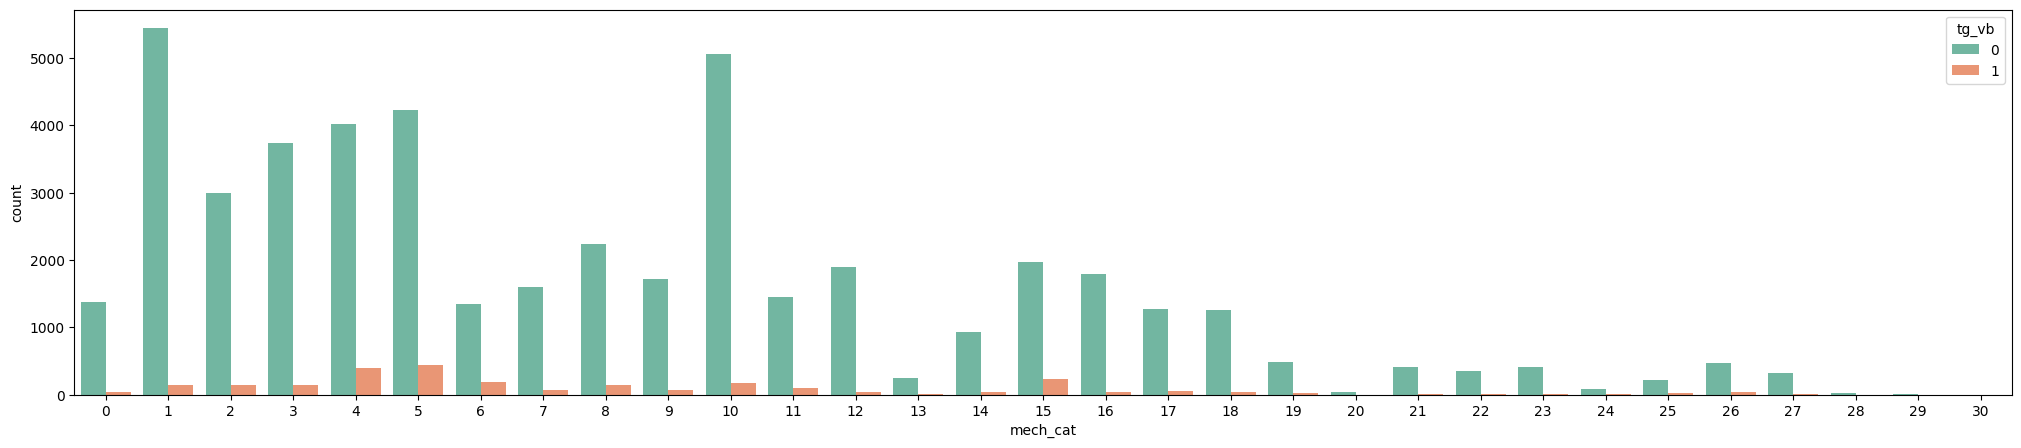

In [ ]:
# seeing the relationship between target value and country
plt.figure(figsize=(25,5))
tv_c_rel = pd.DataFrame(df['Merchant_category'])
codes, uniques = pd.factorize(tv_c_rel['Merchant_category'])
tv_c_rel['mech_cat']=codes
tv_c_rel['tg_vb'] = df['target_variable']
print(tv_c_rel)

sns.countplot(x='mech_cat', hue='tg_vb', data=tv_c_rel, palette='Set2')


In [ ]:
categories = df['Merchant_category'].unique()

for categ in categories:
  print(categ)

Hotels
Fuel
Retail
Dept stores
Rent Payments
Utility
Wallet load
Railways
Insurance
Medical
Cloth stores
Education
Govt services
Home furnishing
Misc Services
Electronics
Restaurants
Business Services
Transportation services
Professional services & memberships
Contracted services
Food
Digital goods
Airline
Direct marketing
Books & stationery
Auto
Alcohol
Music stores
Quasi cash
Airports


In [ ]:
correlation = df['target_variable'].corr(df['credit_limit'])
print(correlation)

-0.09474278120493172


###Finding out the total number of transactions done in overall categories in last 1month, 3month, 6month and 12 months, and deleting the subsequent no of transactions columns and replacing it with *no_of_transactions_1m*

After that, we will be dropping amount of transaction of each cateogory.

In [ ]:
#calculating total number of transactions in last 1 month by adding various columns, and naming it as the *no_of_transactions_1m*
df['no_of_transactions_1m'] = df.iloc[:, 6:41].sum(axis=1)
df.drop(df.columns[6:41], axis=1, inplace=True)
df.insert(6, "no_of_transactions_1m", df.pop("no_of_transactions_1m"))
#dropping the transaction amount columns of each catergory in last 1 months
df = df.drop(df.iloc[:,7:42 ], axis=1)




#calculating total number of transactions in last 3 month by adding various columns, and naming it as the *no_of_transactions_3m*
df['no_of_transactions_3m'] = df.iloc[:, 7:42].sum(axis=1)
df.drop(df.columns[7:42], axis=1, inplace=True)
df.insert(7, "no_of_transactions_3m", df.pop("no_of_transactions_3m"))
#dropping the transaction amount columns of each catergory in last 3 months
df = df.drop(df.iloc[:,8:43 ], axis=1)



#calculating total number of transactions in last 6 month by adding various columns, and naming it as the *no_of_transactions_6m*
df['no_of_transactions_6m'] = df.iloc[:, 8:43].sum(axis=1)
df.drop(df.columns[8:43], axis=1, inplace=True)
df.insert(8, "no_of_transactions_6m", df.pop("no_of_transactions_6m"))
#dropping the transaction amount columns of each catergory in last 6 months
df = df.drop(df.iloc[:,9:44 ], axis=1)



#calculating total number of transactions in last 12 month by adding various columns, and naming it as the *no_of_transactions_12m*
df['no_of_transactions_12m'] = df.iloc[:, 9:44].sum(axis=1)
df.drop(df.columns[9:44], axis=1, inplace=True)
df.insert(9, "no_of_transactions_12m", df.pop("no_of_transactions_12m"))
#dropping the transaction amount columns of each catergory in last 12 months
df = df.drop(df.iloc[:,10:45 ], axis=1)

In [ ]:
df

,transaction_amount,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,0.066696,IN,0,Hotels,9.0,0.192000,8,24,24,24,...,NaN,3500000.0,38758.460000,64367.369410,113262.353300,160922.632200,-0.168474,-0.597603,-0.445636,Affluent_Card
1,0.010459,IN,0,Fuel,36.0,0.016667,3,8,8,8,...,NaN,NaN,20184.797410,28980.688820,33703.922700,56910.018420,-0.257190,-0.241639,-0.699671,Mass_Card
2,0.002578,IN,0,Retail,22.0,0.064667,9,15,15,15,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,0.005268,IN,0,Retail,22.0,0.064667,9,15,15,15,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,0.071988,HK,0,Retail,22.0,0.064667,9,15,15,15,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.002027,IN,0,Fuel,22.0,0.100000,2,5,5,5,...,NaN,1783657.0,46481.095190,54441.174710,37003.745800,98999.267820,-0.023032,1.675239,-0.755055,Affluent_Card
49996,0.003566,IN,0,Rent Payments,24.0,0.016667,1,1,1,1,...,NaN,166702.0,275.632222,1705.884118,1770.551609,3321.264392,-0.900393,-0.068999,-0.621572,Mass_Card
49997,0.032929,IN,0,Insurance,9.0,0.187333,26,94,94,94,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card
49998,0.000096,IN,0,Medical,9.0,0.187333,26,94,94,94,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card


In [ ]:
# checking the null values in no_of_transactions_1m, no_of_transactions_3m,
#  no_of_transactions_6m, no_of_transactions_12m and performing necessary data preprocessing steps
print(f"Number of null values in no_of_transactions_1m: {df['no_of_transactions_1m'].isnull().sum()}")
print(f"Data type: {df['no_of_transactions_1m'].dtype}")
print(df['no_of_transactions_1m'].describe())
print()
print(f"Number of null values in no_of_transactions_3m: {df['no_of_transactions_3m'].isnull().sum()}")
print(f"Data type: {df['no_of_transactions_3m'].dtype}")
print(df['no_of_transactions_3m'].describe())
print()
print(f"Number of null values in no_of_transactions_6m: {df['no_of_transactions_6m'].isnull().sum()}")
print(f"Data type: {df['no_of_transactions_6m'].dtype}")
print(df['no_of_transactions_6m'].describe())
print()
print(f"Number of null values in no_of_transactions_12m: {df['no_of_transactions_12m'].isnull().sum()}")
print(f"Data type: {df['no_of_transactions_12m'].dtype}")
print(df['no_of_transactions_12m'].describe())
print()





Number of null values in no_of_transactions_1m: 0
Data type: int64
count    50000.000000
mean        14.150280
std         17.537791
min          1.000000
25%          4.000000
50%          9.000000
75%         18.000000
max        428.000000
Name: no_of_transactions_1m, dtype: float64

Number of null values in no_of_transactions_3m: 0
Data type: int64
count    50000.000000
mean        34.275240
std         42.632004
min          1.000000
25%         10.000000
50%         22.000000
75%         44.000000
max       1191.000000
Name: no_of_transactions_3m, dtype: float64

Number of null values in no_of_transactions_6m: 0
Data type: int64
count    50000.000000
mean        34.275240
std         42.632004
min          1.000000
25%         10.000000
50%         22.000000
75%         44.000000
max       1191.000000
Name: no_of_transactions_6m, dtype: float64

Number of null values in no_of_transactions_12m: 0
Data type: int64
count    50000.000000
mean        34.275240
std         42.632004
mi

In [ ]:
# scaling
scaler = MinMaxScaler(feature_range=(0, 1))
df['no_of_transactions_1m'] = scaler.fit_transform(df[['no_of_transactions_1m']])
df['no_of_transactions_3m'] = scaler.fit_transform(df[['no_of_transactions_3m']])
df['no_of_transactions_6m'] = scaler.fit_transform(df[['no_of_transactions_6m']])
df['no_of_transactions_12m'] = scaler.fit_transform(df[['no_of_transactions_12m']])


In [ ]:
df

,transaction_amount,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,0.066696,IN,0,Hotels,9.0,0.192000,0.016393,0.019328,0.019328,0.019328,...,NaN,3500000.0,38758.460000,64367.369410,113262.353300,160922.632200,-0.168474,-0.597603,-0.445636,Affluent_Card
1,0.010459,IN,0,Fuel,36.0,0.016667,0.004684,0.005882,0.005882,0.005882,...,NaN,NaN,20184.797410,28980.688820,33703.922700,56910.018420,-0.257190,-0.241639,-0.699671,Mass_Card
2,0.002578,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,0.005268,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,0.071988,HK,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.002027,IN,0,Fuel,22.0,0.100000,0.002342,0.003361,0.003361,0.003361,...,NaN,1783657.0,46481.095190,54441.174710,37003.745800,98999.267820,-0.023032,1.675239,-0.755055,Affluent_Card
49996,0.003566,IN,0,Rent Payments,24.0,0.016667,0.000000,0.000000,0.000000,0.000000,...,NaN,166702.0,275.632222,1705.884118,1770.551609,3321.264392,-0.900393,-0.068999,-0.621572,Mass_Card
49997,0.032929,IN,0,Insurance,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card
49998,0.000096,IN,0,Medical,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card


In [ ]:
# analysing spend money
df['spends_1m'].describe()
df['spends_1m'] = scaler.fit_transform(df[['spends_1m']])


No null values , no absurd values like negative spend value, data type is also correct

In [ ]:
df['spends_3m'].describe()
df['spends_3m'] = scaler.fit_transform(df[['spends_3m']])


In [ ]:
df['spends_6m'].describe()
df['spends_6m'] = scaler.fit_transform(df[['spends_6m']])


In [ ]:
df['spends_12m'].describe()
df['spends_12m'] = scaler.fit_transform(df[['spends_12m']])


In [ ]:
df['spends_12m'].head()

0    0.029642
1    0.003433
2    0.014526
3    0.014526
4    0.014526
Name: spends_12m, dtype: float64

In [ ]:
df.head()

,transaction_amount,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,0.066696,IN,0,Hotels,9.0,0.192000,0.016393,0.019328,0.019328,0.019328,...,NaN,3500000.0,38758.46000,64367.36941,113262.3533,160922.63220,-0.168474,-0.597603,-0.445636,Affluent_Card
1,0.010459,IN,0,Fuel,36.0,0.016667,0.004684,0.005882,0.005882,0.005882,...,NaN,NaN,20184.79741,28980.68882,33703.9227,56910.01842,-0.257190,-0.241639,-0.699671,Mass_Card
2,0.002578,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,0.005268,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,0.071988,HK,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card


In [ ]:
df.drop(['merchant_country'], axis = 1)

,transaction_amount,target_variable,Merchant_category,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,spends_1m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,0.066696,0,Hotels,9.0,0.192000,0.016393,0.019328,0.019328,0.019328,0.026764,...,NaN,3500000.0,38758.460000,64367.369410,113262.353300,160922.632200,-0.168474,-0.597603,-0.445636,Affluent_Card
1,0.010459,0,Fuel,36.0,0.016667,0.004684,0.005882,0.005882,0.005882,0.002145,...,NaN,NaN,20184.797410,28980.688820,33703.922700,56910.018420,-0.257190,-0.241639,-0.699671,Mass_Card
2,0.002578,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,0.021956,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,0.005268,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,0.021956,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,0.071988,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,0.021956,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.002027,0,Fuel,22.0,0.100000,0.002342,0.003361,0.003361,0.003361,0.005900,...,NaN,1783657.0,46481.095190,54441.174710,37003.745800,98999.267820,-0.023032,1.675239,-0.755055,Affluent_Card
49996,0.003566,0,Rent Payments,24.0,0.016667,0.000000,0.000000,0.000000,0.000000,0.000307,...,NaN,166702.0,275.632222,1705.884118,1770.551609,3321.264392,-0.900393,-0.068999,-0.621572,Mass_Card
49997,0.032929,0,Insurance,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,0.013838,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card
49998,0.000096,0,Medical,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,0.013838,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card


In [ ]:
df

,transaction_amount,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,0.066696,IN,0,Hotels,9.0,0.192000,0.016393,0.019328,0.019328,0.019328,...,NaN,3500000.0,38758.460000,64367.369410,113262.353300,160922.632200,-0.168474,-0.597603,-0.445636,Affluent_Card
1,0.010459,IN,0,Fuel,36.0,0.016667,0.004684,0.005882,0.005882,0.005882,...,NaN,NaN,20184.797410,28980.688820,33703.922700,56910.018420,-0.257190,-0.241639,-0.699671,Mass_Card
2,0.002578,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,0.005268,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,0.071988,HK,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.002027,IN,0,Fuel,22.0,0.100000,0.002342,0.003361,0.003361,0.003361,...,NaN,1783657.0,46481.095190,54441.174710,37003.745800,98999.267820,-0.023032,1.675239,-0.755055,Affluent_Card
49996,0.003566,IN,0,Rent Payments,24.0,0.016667,0.000000,0.000000,0.000000,0.000000,...,NaN,166702.0,275.632222,1705.884118,1770.551609,3321.264392,-0.900393,-0.068999,-0.621572,Mass_Card
49997,0.032929,IN,0,Insurance,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card
49998,0.000096,IN,0,Medical,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card


In [ ]:
#Analysing the no of times a customer revolves,
df['revolve_1m'].describe()

count    46579.000000
mean         0.088817
std          0.284482
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: revolve_1m, dtype: float64

The column contains some null values and contains only binary values. We will now analyse the number of times the  ***target_variable***  value is 1 when the ***revolve_1m***  column value is NULL.

In [ ]:
count_when_null = len(df[(df['target_variable'] == 1) & (df['revolve_6m'].isnull())])
print(f"# of times the target_variable value is 1 when revolve_6m column value is NULL: {count_when_null}")
count_when_zero = len(df[(df['target_variable'] == 1) & (df['revolve_6m'] == 0)])
print(f"# of times the target_variable value is 1 when revolve_6m column value is zero: {count_when_zero}")
count_when_one = len(df[(df['target_variable'] == 1) & (df['revolve_6m'] == 1)])
print(f"# of times the target_variable value is 1 when revolve_6m column value is one: {count_when_one}")
print()
print()
count_when_null = len(df[(df['target_variable'] == 0) & (df['revolve_6m'].isnull())])
print(f"# of times the target_variable value is 0 when revolve_6m column value is NULL: {count_when_null}")
count_when_zero = len(df[(df['target_variable'] == 0) & (df['revolve_6m'] == 0)])
print(f"# of times the target_variable value is 0 when revolve_6m column value is zero: {count_when_zero}")
count_when_one = len(df[(df['target_variable'] == 0) & (df['revolve_6m'] == 1)])
print(f"# of times the target_variable value is 0 when revolve_6m column value is one: {count_when_one}")


# of times the target_variable value is 1 when revolve_6m column value is NULL: 340
# of times the target_variable value is 1 when revolve_6m column value is zero: 1467
# of times the target_variable value is 1 when revolve_6m column value is one: 813


# of times the target_variable value is 0 when revolve_6m column value is NULL: 3081
# of times the target_variable value is 0 when revolve_6m column value is zero: 36511
# of times the target_variable value is 0 when revolve_6m column value is one: 7788


As we know that when the there is higher number of revolve period, the more people will opt for EMI conversion, As we can see from above, the number of people whose revolve number is 0 and have not opted for the emi is larger in number, which tells that, the probability of having revolve number 1 and opting for emi can be high, , some outliers are still there, like revolve number is 1 still the number of people not taking emi is higher, But while training the model, one considers the other factors also. But since majority of the numbers are quite higher of revolve being 0 and target being also 0 so, will fill the those null values, whose target is 1 as 1 and vice versa.

In [ ]:
import numpy as np
df['revolve_6m'] = np.where(df['target_variable'] == 1, df['revolve_6m'].fillna(1), df['revolve_6m'].fillna(0))
#to check, whether , all the null values are filled as per the description,
# counts = df['revolve_6m'].value_counts()
# print(counts)
print()
df['revolve_6m'].describe()

count    50000.000000
mean         0.178820
std          0.383205
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: revolve_6m, dtype: float64

Now dropping revolve_1m, revolve_3m, married_flag from the dataset

In [ ]:
df.drop(['revolve_6m','revolve_3m', 'married_flag'], axis=1)

,transaction_amount,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,0.066696,IN,0,Hotels,9.0,0.192000,0.016393,0.019328,0.019328,0.019328,...,NaN,3500000.0,38758.460000,64367.369410,113262.353300,160922.632200,-0.168474,-0.597603,-0.445636,Affluent_Card
1,0.010459,IN,0,Fuel,36.0,0.016667,0.004684,0.005882,0.005882,0.005882,...,NaN,NaN,20184.797410,28980.688820,33703.922700,56910.018420,-0.257190,-0.241639,-0.699671,Mass_Card
2,0.002578,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,0.005268,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,0.071988,HK,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.002027,IN,0,Fuel,22.0,0.100000,0.002342,0.003361,0.003361,0.003361,...,NaN,1783657.0,46481.095190,54441.174710,37003.745800,98999.267820,-0.023032,1.675239,-0.755055,Affluent_Card
49996,0.003566,IN,0,Rent Payments,24.0,0.016667,0.000000,0.000000,0.000000,0.000000,...,NaN,166702.0,275.632222,1705.884118,1770.551609,3321.264392,-0.900393,-0.068999,-0.621572,Mass_Card
49997,0.032929,IN,0,Insurance,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card
49998,0.000096,IN,0,Medical,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card


In [ ]:
df.describe()

,transaction_amount,target_variable,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,spends_1m,spends_3m,...,Bureau_unsec_amt_live,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,1.472200e+04,1.020100e+04,3.655000e+04,4.689200e+04,4.689200e+04,4.689200e+04,4.689200e+04,44333.000000,4.419200e+04,4.279900e+04
mean,0.016802,0.052400,25.113156,0.150764,0.030797,0.027962,0.027962,0.027962,0.009539,0.010797,...,2.192050e+06,8.483749e+06,4.121672e+06,5.082253e+05,4.971120e+05,4.947797e+05,5.275031e+05,29.727900,5.777793e+02,8.575324e+01
std,0.036396,0.222835,8.727472,0.171456,0.041072,0.035825,0.035825,0.035825,0.030013,0.030980,...,2.204898e+07,3.484723e+07,3.030054e+07,3.523719e+06,2.701164e+06,2.404562e+06,2.605561e+06,1887.020750,6.038176e+04,7.522945e+03
min,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00
25%,0.001579,0.000000,20.000000,0.044667,0.007026,0.007563,0.007563,0.007563,0.002017,0.002470,...,1.000000e+05,1.960000e+06,1.996710e+05,5.433556e+03,7.518414e+03,9.299676e+03,1.083820e+04,-0.332234,-4.260541e-01,-5.232751e-01
50%,0.004756,0.000000,24.000000,0.092667,0.018735,0.017647,0.017647,0.017647,0.004430,0.005269,...,3.959410e+05,3.400000e+06,7.732840e+05,3.268721e+04,3.838613e+04,4.433934e+04,5.529839e+04,-0.002083,-2.892047e-02,-6.563808e-02
75%,0.016255,0.000000,34.000000,0.200000,0.039813,0.036134,0.036134,0.036134,0.009651,0.011125,...,1.000000e+06,6.441810e+06,2.858976e+06,1.850243e+05,2.047905e+05,2.284429e+05,2.812371e+05,0.304483,4.309597e-01,5.025618e-01
max,1.000000,1.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.500000e+09,8.980000e+08,1.510000e+09,2.430000e+08,1.590000e+08,1.360000e+08,1.130000e+08,245680.555600,8.859915e+06,1.072938e+06


In [ ]:
df.drop(['util_3m', 'util_1m', 'util_6m', 'payment_ratio_1m', 'payment_ratio_6m', 'payment_ratio_3m', 'paymad_1m', 'paymad_3m', 'paymad_6m'], axis = 1)

,transaction_amount,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,0.066696,IN,0,Hotels,9.0,0.192000,0.016393,0.019328,0.019328,0.019328,...,NaN,3500000.0,38758.460000,64367.369410,113262.353300,160922.632200,-0.168474,-0.597603,-0.445636,Affluent_Card
1,0.010459,IN,0,Fuel,36.0,0.016667,0.004684,0.005882,0.005882,0.005882,...,NaN,NaN,20184.797410,28980.688820,33703.922700,56910.018420,-0.257190,-0.241639,-0.699671,Mass_Card
2,0.002578,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,0.005268,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,0.071988,HK,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.002027,IN,0,Fuel,22.0,0.100000,0.002342,0.003361,0.003361,0.003361,...,NaN,1783657.0,46481.095190,54441.174710,37003.745800,98999.267820,-0.023032,1.675239,-0.755055,Affluent_Card
49996,0.003566,IN,0,Rent Payments,24.0,0.016667,0.000000,0.000000,0.000000,0.000000,...,NaN,166702.0,275.632222,1705.884118,1770.551609,3321.264392,-0.900393,-0.068999,-0.621572,Mass_Card
49997,0.032929,IN,0,Insurance,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card
49998,0.000096,IN,0,Medical,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   transaction_amount                50000 non-null  float64
 1   merchant_country                  50000 non-null  object 
 2   target_variable                   50000 non-null  int64  
 3   Merchant_category                 50000 non-null  object 
 4   revolve_interest_rate             50000 non-null  float64
 5   credit_limit                      50000 non-null  float64
 6   no_of_transactions_1m             50000 non-null  float64
 7   no_of_transactions_3m             50000 non-null  float64
 8   no_of_transactions_6m             50000 non-null  float64
 9   no_of_transactions_12m            50000 non-null  float64
 10  spends_1m                         50000 non-null  float64
 11  spends_3m                         50000 non-null  float64
 12  spen

In [ ]:
null_val_in_emi_before=df['has_taken_emi_before'].isnull().sum()
print(f"total null values in the column has_taken_before: {null_val_in_emi_before}")
print()

print(df['has_taken_emi_before'].info())
print()

# count how many of the numbers are greater than 0 whose target values are 1, this will enable us to indentify,
# the required feature needed for, training model.

count = len(df[(df['has_taken_emi_before'] > 0) & (df['target_variable'] == 1)])
print(f"Count of the number who are greater than 0 and having target variable as 1: {count}")
print()

# filling the null values with 0
df['has_taken_emi_before'].fillna(0, inplace=True)
corr = df['has_taken_emi_before'].corr(df['target_variable'])


total null values in the column has_taken_before: 39958

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: has_taken_emi_before
Non-Null Count  Dtype  
--------------  -----  
10042 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB
None

Count of the number who are greater than 0 and having target variable as 1: 1487



Similarly, doing the above procedure for, 'count_of_emi_before' column.

In [ ]:
null_val_in_emi_before=df['count_of_emi_before'].isnull().sum()
print(f"total null values in the column has_taken_before: {null_val_in_emi_before}")
print()

print(df['count_of_emi_before'].info())
print()

# count how many of the numbers are greater than 0 whose target values are 1, this will enable us to indentify,
# the required feature needed for, training model.

count = len(df[(df['count_of_emi_before'] > 0) & (df['target_variable'] == 1)])
print(f"Count of the number who are greater than 0 and having target variable as 1: {count}")
print()

# filling the null values with 0
df['count_of_emi_before'].fillna(0, inplace=True)
corr = df['count_of_emi_before'].corr(df['target_variable'])
corr

total null values in the column has_taken_before: 39958

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: count_of_emi_before
Non-Null Count  Dtype  
--------------  -----  
10042 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB
None

Count of the number who are greater than 0 and having target variable as 1: 1487



0.27203274210226

Since both the colums have quite high correlation with, target variable. I have decided not to drop them.

checking correlation with age.

In [ ]:
corr = df['age'].corr(df['target_variable'])
# corr
# turning the age value to positive
df['age'] = df['age']*-1

#scaling the age, for training purpose.
df['age'] = scaler.fit_transform(df[['age']])
df['age']

0        0.088732
1        0.362303
2        0.145250
3        0.145250
4        0.145250
           ...   
49995    0.373678
49996    0.110682
49997    0.380343
49998    0.380343
49999    0.150138
Name: age, Length: 50000, dtype: float64

Checking correlation with asset ownership

In [ ]:
corr = df['ASSET_OWNERSHIP'].corr(df['target_variable'])
corr

df['ASSET_OWNERSHIP'].describe()

count    50000.000000
mean         0.338540
std          0.473218
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: ASSET_OWNERSHIP, dtype: float64

In [ ]:
index1 = df.columns.get_loc('Bureau_AL_amt_ever')
print(index1)

index2 = df.columns.get_loc('Bureau_sec_amt_live')
print(index2)

#dropping columns from index 19 to 47.
df.drop(df.columns[19:48], axis=1)
df

31
59


,transaction_amount,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,0.066696,IN,0,Hotels,9.0,0.192000,0.016393,0.019328,0.019328,0.019328,...,NaN,3500000.0,38758.460000,64367.369410,113262.353300,160922.632200,-0.168474,-0.597603,-0.445636,Affluent_Card
1,0.010459,IN,0,Fuel,36.0,0.016667,0.004684,0.005882,0.005882,0.005882,...,NaN,NaN,20184.797410,28980.688820,33703.922700,56910.018420,-0.257190,-0.241639,-0.699671,Mass_Card
2,0.002578,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,0.005268,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,0.071988,HK,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.002027,IN,0,Fuel,22.0,0.100000,0.002342,0.003361,0.003361,0.003361,...,NaN,1783657.0,46481.095190,54441.174710,37003.745800,98999.267820,-0.023032,1.675239,-0.755055,Affluent_Card
49996,0.003566,IN,0,Rent Payments,24.0,0.016667,0.000000,0.000000,0.000000,0.000000,...,NaN,166702.0,275.632222,1705.884118,1770.551609,3321.264392,-0.900393,-0.068999,-0.621572,Mass_Card
49997,0.032929,IN,0,Insurance,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card
49998,0.000096,IN,0,Medical,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card


preprocess the Bureau_all_amt_live, column and find its null values.

In [ ]:
df.shape

(50000, 69)

In [ ]:
df['Bureau_all_amt_live'].fillna(0, inplace=True)
corr = df['target_variable'].corr(df['Bureau_all_amt_live'])
corr

-0.016040177593636604

In [ ]:
df['avg_sa_balance_12m'].fillna(0, inplace=True)
corr = df['avg_sa_balance_6m'].corr(df['target_variable'])
corr

-0.04193690544718489

In [ ]:
df.drop(['avg_sa_balance_6m', 'avg_sa_balance_1m', 'avg_sa_balance_3m'], axis = 1)



,transaction_amount,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,...,Bureau_TW_amt_live,Bureau_UC_amt_live,Bureau_unsec_amt_live,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,0.066696,IN,0,Hotels,9.0,0.192000,0.016393,0.019328,0.019328,0.019328,...,NaN,NaN,3500000.0,NaN,3500000.0,160922.632200,-0.168474,-0.597603,-0.445636,Affluent_Card
1,0.010459,IN,0,Fuel,36.0,0.016667,0.004684,0.005882,0.005882,0.005882,...,NaN,NaN,NaN,NaN,0.0,56910.018420,-0.257190,-0.241639,-0.699671,Mass_Card
2,0.002578,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,NaN,500.0,NaN,51863.0,0.000000,NaN,NaN,NaN,Mass_Card
3,0.005268,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,NaN,500.0,NaN,51863.0,0.000000,NaN,NaN,NaN,Mass_Card
4,0.071988,HK,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,NaN,500.0,NaN,51863.0,0.000000,NaN,NaN,NaN,Mass_Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.002027,IN,0,Fuel,22.0,0.100000,0.002342,0.003361,0.003361,0.003361,...,NaN,NaN,NaN,NaN,1783657.0,98999.267820,-0.023032,1.675239,-0.755055,Affluent_Card
49996,0.003566,IN,0,Rent Payments,24.0,0.016667,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,2000.0,NaN,166702.0,3321.264392,-0.900393,-0.068999,-0.621572,Mass_Card
49997,0.032929,IN,0,Insurance,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,NaN,NaN,NaN,7500000.0,8073963.0,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card
49998,0.000096,IN,0,Medical,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,NaN,NaN,NaN,7500000.0,8073963.0,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card


In [ ]:
df.shape

(50000, 69)

In [ ]:
df['product'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: product
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


<Axes: xlabel='product', ylabel='count'>

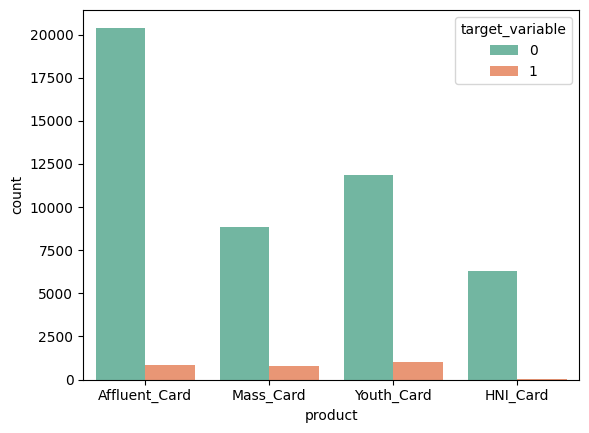

In [ ]:
sns.countplot(x='product', hue='target_variable', data=df, palette='Set2')


In [ ]:
df.drop(['product'], axis = 1)


,transaction_amount,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,...,Bureau_unsec_amt_live,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m
0,0.066696,IN,0,Hotels,9.0,0.192000,0.016393,0.019328,0.019328,0.019328,...,3500000.0,NaN,3500000.0,38758.460000,64367.369410,113262.353300,160922.632200,-0.168474,-0.597603,-0.445636
1,0.010459,IN,0,Fuel,36.0,0.016667,0.004684,0.005882,0.005882,0.005882,...,NaN,NaN,0.0,20184.797410,28980.688820,33703.922700,56910.018420,-0.257190,-0.241639,-0.699671
2,0.002578,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,500.0,NaN,51863.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
3,0.005268,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,500.0,NaN,51863.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
4,0.071988,HK,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,500.0,NaN,51863.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.002027,IN,0,Fuel,22.0,0.100000,0.002342,0.003361,0.003361,0.003361,...,NaN,NaN,1783657.0,46481.095190,54441.174710,37003.745800,98999.267820,-0.023032,1.675239,-0.755055
49996,0.003566,IN,0,Rent Payments,24.0,0.016667,0.000000,0.000000,0.000000,0.000000,...,2000.0,NaN,166702.0,275.632222,1705.884118,1770.551609,3321.264392,-0.900393,-0.068999,-0.621572
49997,0.032929,IN,0,Insurance,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,NaN,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141
49998,0.000096,IN,0,Medical,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,NaN,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141


In [ ]:
df.describe()

,transaction_amount,target_variable,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,spends_1m,spends_3m,...,Bureau_unsec_amt_live,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,1.472200e+04,1.020100e+04,5.000000e+04,4.689200e+04,4.689200e+04,4.689200e+04,5.000000e+04,44333.000000,4.419200e+04,4.279900e+04
mean,0.016802,0.052400,25.113156,0.150764,0.030797,0.027962,0.027962,0.027962,0.009539,0.010797,...,2.192050e+06,8.483749e+06,3.012942e+06,5.082253e+05,4.971120e+05,4.947797e+05,4.947135e+05,29.727900,5.777793e+02,8.575324e+01
std,0.036396,0.222835,8.727472,0.171456,0.041072,0.035825,0.035825,0.035825,0.030013,0.030980,...,2.204898e+07,3.484723e+07,2.597082e+07,3.523719e+06,2.701164e+06,2.404562e+06,2.526492e+06,1887.020750,6.038176e+04,7.522945e+03
min,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00
25%,0.001579,0.000000,20.000000,0.044667,0.007026,0.007563,0.007563,0.007563,0.002017,0.002470,...,1.000000e+05,1.960000e+06,0.000000e+00,5.433556e+03,7.518414e+03,9.299676e+03,6.561070e+03,-0.332234,-4.260541e-01,-5.232751e-01
50%,0.004756,0.000000,24.000000,0.092667,0.018735,0.017647,0.017647,0.017647,0.004430,0.005269,...,3.959410e+05,3.400000e+06,2.962010e+05,3.268721e+04,3.838613e+04,4.433934e+04,4.598378e+04,-0.002083,-2.892047e-02,-6.563808e-02
75%,0.016255,0.000000,34.000000,0.200000,0.039813,0.036134,0.036134,0.036134,0.009651,0.011125,...,1.000000e+06,6.441810e+06,1.729342e+06,1.850243e+05,2.047905e+05,2.284429e+05,2.502654e+05,0.304483,4.309597e-01,5.025618e-01
max,1.000000,1.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.500000e+09,8.980000e+08,1.510000e+09,2.430000e+08,1.590000e+08,1.360000e+08,1.130000e+08,245680.555600,8.859915e+06,1.072938e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   transaction_amount                50000 non-null  float64
 1   merchant_country                  50000 non-null  object 
 2   target_variable                   50000 non-null  int64  
 3   Merchant_category                 50000 non-null  object 
 4   revolve_interest_rate             50000 non-null  float64
 5   credit_limit                      50000 non-null  float64
 6   no_of_transactions_1m             50000 non-null  float64
 7   no_of_transactions_3m             50000 non-null  float64
 8   no_of_transactions_6m             50000 non-null  float64
 9   no_of_transactions_12m            50000 non-null  float64
 10  spends_1m                         50000 non-null  float64
 11  spends_3m                         50000 non-null  float64
 12  spen

In [ ]:
#since some age is missing, we can replace, it with the average
average_age = df['age'].mean()
df['age'].fillna(average_age, inplace = True)


In [ ]:
df.describe()

,transaction_amount,target_variable,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,spends_1m,spends_3m,...,Bureau_unsec_amt_live,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,1.472200e+04,1.020100e+04,5.000000e+04,4.689200e+04,4.689200e+04,4.689200e+04,5.000000e+04,44333.000000,4.419200e+04,4.279900e+04
mean,0.016802,0.052400,25.113156,0.150764,0.030797,0.027962,0.027962,0.027962,0.009539,0.010797,...,2.192050e+06,8.483749e+06,3.012942e+06,5.082253e+05,4.971120e+05,4.947797e+05,4.947135e+05,29.727900,5.777793e+02,8.575324e+01
std,0.036396,0.222835,8.727472,0.171456,0.041072,0.035825,0.035825,0.035825,0.030013,0.030980,...,2.204898e+07,3.484723e+07,2.597082e+07,3.523719e+06,2.701164e+06,2.404562e+06,2.526492e+06,1887.020750,6.038176e+04,7.522945e+03
min,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00
25%,0.001579,0.000000,20.000000,0.044667,0.007026,0.007563,0.007563,0.007563,0.002017,0.002470,...,1.000000e+05,1.960000e+06,0.000000e+00,5.433556e+03,7.518414e+03,9.299676e+03,6.561070e+03,-0.332234,-4.260541e-01,-5.232751e-01
50%,0.004756,0.000000,24.000000,0.092667,0.018735,0.017647,0.017647,0.017647,0.004430,0.005269,...,3.959410e+05,3.400000e+06,2.962010e+05,3.268721e+04,3.838613e+04,4.433934e+04,4.598378e+04,-0.002083,-2.892047e-02,-6.563808e-02
75%,0.016255,0.000000,34.000000,0.200000,0.039813,0.036134,0.036134,0.036134,0.009651,0.011125,...,1.000000e+06,6.441810e+06,1.729342e+06,1.850243e+05,2.047905e+05,2.284429e+05,2.502654e+05,0.304483,4.309597e-01,5.025618e-01
max,1.000000,1.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.500000e+09,8.980000e+08,1.510000e+09,2.430000e+08,1.590000e+08,1.360000e+08,1.130000e+08,245680.555600,8.859915e+06,1.072938e+06


In [ ]:
# scale avg...1 , 3 , 6 , 12 , by filling null values 0 and dropping pcthg_curr_sa.......
df.drop(['pctchg_curr_sa_bal_avg_sa_bal_1m', 'pctchg_curr_sa_bal_avg_sa_bal_3m', 'pctchg_curr_sa_bal_avg_sa_bal_6m'], axis = 1)


,transaction_amount,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,...,Bureau_TW_amt_live,Bureau_UC_amt_live,Bureau_unsec_amt_live,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,product
0,0.066696,IN,0,Hotels,9.0,0.192000,0.016393,0.019328,0.019328,0.019328,...,NaN,NaN,3500000.0,NaN,3500000.0,38758.460000,64367.369410,113262.353300,160922.632200,Affluent_Card
1,0.010459,IN,0,Fuel,36.0,0.016667,0.004684,0.005882,0.005882,0.005882,...,NaN,NaN,NaN,NaN,0.0,20184.797410,28980.688820,33703.922700,56910.018420,Mass_Card
2,0.002578,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,NaN,500.0,NaN,51863.0,NaN,NaN,NaN,0.000000,Mass_Card
3,0.005268,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,NaN,500.0,NaN,51863.0,NaN,NaN,NaN,0.000000,Mass_Card
4,0.071988,HK,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,NaN,500.0,NaN,51863.0,NaN,NaN,NaN,0.000000,Mass_Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.002027,IN,0,Fuel,22.0,0.100000,0.002342,0.003361,0.003361,0.003361,...,NaN,NaN,NaN,NaN,1783657.0,46481.095190,54441.174710,37003.745800,98999.267820,Affluent_Card
49996,0.003566,IN,0,Rent Payments,24.0,0.016667,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,2000.0,NaN,166702.0,275.632222,1705.884118,1770.551609,3321.264392,Mass_Card
49997,0.032929,IN,0,Insurance,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,NaN,NaN,NaN,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,Affluent_Card
49998,0.000096,IN,0,Medical,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,NaN,NaN,NaN,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,Affluent_Card


In [ ]:
df

,transaction_amount,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,0.066696,IN,0,Hotels,9.0,0.192000,0.016393,0.019328,0.019328,0.019328,...,NaN,3500000.0,38758.460000,64367.369410,113262.353300,160922.632200,-0.168474,-0.597603,-0.445636,Affluent_Card
1,0.010459,IN,0,Fuel,36.0,0.016667,0.004684,0.005882,0.005882,0.005882,...,NaN,0.0,20184.797410,28980.688820,33703.922700,56910.018420,-0.257190,-0.241639,-0.699671,Mass_Card
2,0.002578,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,Mass_Card
3,0.005268,IN,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,Mass_Card
4,0.071988,HK,0,Retail,22.0,0.064667,0.018735,0.011765,0.011765,0.011765,...,NaN,51863.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,Mass_Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.002027,IN,0,Fuel,22.0,0.100000,0.002342,0.003361,0.003361,0.003361,...,NaN,1783657.0,46481.095190,54441.174710,37003.745800,98999.267820,-0.023032,1.675239,-0.755055,Affluent_Card
49996,0.003566,IN,0,Rent Payments,24.0,0.016667,0.000000,0.000000,0.000000,0.000000,...,NaN,166702.0,275.632222,1705.884118,1770.551609,3321.264392,-0.900393,-0.068999,-0.621572,Mass_Card
49997,0.032929,IN,0,Insurance,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card
49998,0.000096,IN,0,Medical,9.0,0.187333,0.058548,0.078151,0.078151,0.078151,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   transaction_amount                50000 non-null  float64
 1   merchant_country                  50000 non-null  object 
 2   target_variable                   50000 non-null  int64  
 3   Merchant_category                 50000 non-null  object 
 4   revolve_interest_rate             50000 non-null  float64
 5   credit_limit                      50000 non-null  float64
 6   no_of_transactions_1m             50000 non-null  float64
 7   no_of_transactions_3m             50000 non-null  float64
 8   no_of_transactions_6m             50000 non-null  float64
 9   no_of_transactions_12m            50000 non-null  float64
 10  spends_1m                         50000 non-null  float64
 11  spends_3m                         50000 non-null  float64
 12  spen

In [ ]:
df.drop(['merchant_country', 'Merchant_category'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   transaction_amount                50000 non-null  float64
 1   target_variable                   50000 non-null  int64  
 2   revolve_interest_rate             50000 non-null  float64
 3   credit_limit                      50000 non-null  float64
 4   no_of_transactions_1m             50000 non-null  float64
 5   no_of_transactions_3m             50000 non-null  float64
 6   no_of_transactions_6m             50000 non-null  float64
 7   no_of_transactions_12m            50000 non-null  float64
 8   spends_1m                         50000 non-null  float64
 9   spends_3m                         50000 non-null  float64
 10  spends_6m                         50000 non-null  float64
 11  spends_12m                        50000 non-null  float64
 12  revo

In [ ]:
df.drop(['revolve_1m', 'revolve_3m', 'util_1m', 'util_3m', 'util_6m', 'payment_ratio_1m', 'payment_ratio_3m', 'payment_ratio_6m', 'paymad_1m', 'paymad_3m', 'paymad_6m'],axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   transaction_amount                50000 non-null  float64
 1   target_variable                   50000 non-null  int64  
 2   revolve_interest_rate             50000 non-null  float64
 3   credit_limit                      50000 non-null  float64
 4   no_of_transactions_1m             50000 non-null  float64
 5   no_of_transactions_3m             50000 non-null  float64
 6   no_of_transactions_6m             50000 non-null  float64
 7   no_of_transactions_12m            50000 non-null  float64
 8   spends_1m                         50000 non-null  float64
 9   spends_3m                         50000 non-null  float64
 10  spends_6m                         50000 non-null  float64
 11  spends_12m                        50000 non-null  float64
 12  revo

In [ ]:
df.drop(df.columns[[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,36,37,38,39,40,41,42,43,44,45,46,47]], axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   transaction_amount                50000 non-null  float64
 1   target_variable                   50000 non-null  int64  
 2   revolve_interest_rate             50000 non-null  float64
 3   credit_limit                      50000 non-null  float64
 4   no_of_transactions_1m             50000 non-null  float64
 5   no_of_transactions_3m             50000 non-null  float64
 6   no_of_transactions_6m             50000 non-null  float64
 7   no_of_transactions_12m            50000 non-null  float64
 8   spends_1m                         50000 non-null  float64
 9   spends_3m                         50000 non-null  float64
 10  spends_6m                         50000 non-null  float64
 11  spends_12m                        50000 non-null  float64
 12  revo

In [ ]:
df.drop(df.columns[[18,19,22,23,24, 25]], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_amount      50000 non-null  float64
 1   target_variable         50000 non-null  int64  
 2   revolve_interest_rate   50000 non-null  float64
 3   credit_limit            50000 non-null  float64
 4   no_of_transactions_1m   50000 non-null  float64
 5   no_of_transactions_3m   50000 non-null  float64
 6   no_of_transactions_6m   50000 non-null  float64
 7   no_of_transactions_12m  50000 non-null  float64
 8   spends_1m               50000 non-null  float64
 9   spends_3m               50000 non-null  float64
 10  spends_6m               50000 non-null  float64
 11  spends_12m              50000 non-null  float64
 12  revolve_6m              50000 non-null  float64
 13  has_taken_emi_before    50000 non-null  float64
 14  count_of_emi_before     50000 non-null

In [ ]:
df.drop(['avg_sa_balance_6m'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_amount      50000 non-null  float64
 1   target_variable         50000 non-null  int64  
 2   revolve_interest_rate   50000 non-null  float64
 3   credit_limit            50000 non-null  float64
 4   no_of_transactions_1m   50000 non-null  float64
 5   no_of_transactions_3m   50000 non-null  float64
 6   no_of_transactions_6m   50000 non-null  float64
 7   no_of_transactions_12m  50000 non-null  float64
 8   spends_1m               50000 non-null  float64
 9   spends_3m               50000 non-null  float64
 10  spends_6m               50000 non-null  float64
 11  spends_12m              50000 non-null  float64
 12  revolve_6m              50000 non-null  float64
 13  has_taken_emi_before    50000 non-null  float64
 14  count_of_emi_before     50000 non-null

In [ ]:
df.describe()

,transaction_amount,target_variable,revolve_interest_rate,credit_limit,no_of_transactions_1m,no_of_transactions_3m,no_of_transactions_6m,no_of_transactions_12m,spends_1m,spends_3m,spends_6m,spends_12m,revolve_6m,has_taken_emi_before,count_of_emi_before,age,married_flag,ASSET_OWNERSHIP,avg_sa_balance_12m
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000,5.000000e+04
mean,0.016802,0.052400,25.113156,0.150764,0.030797,0.027962,0.027962,0.027962,0.009539,0.010797,0.010797,0.010797,0.178820,0.200840,0.640000,0.284056,0.0,0.338540,4.947135e+05
std,0.036396,0.222835,8.727472,0.171456,0.041072,0.035825,0.035825,0.035825,0.030013,0.030980,0.030980,0.030980,0.383205,0.400633,2.328783,0.188462,0.0,0.473218,2.526492e+06
min,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00
25%,0.001579,0.000000,20.000000,0.044667,0.007026,0.007563,0.007563,0.007563,0.002017,0.002470,0.002470,0.002470,0.000000,0.000000,0.000000,0.145295,0.0,0.000000,6.561070e+03
50%,0.004756,0.000000,24.000000,0.092667,0.018735,0.017647,0.017647,0.017647,0.004430,0.005269,0.005269,0.005269,0.000000,0.000000,0.000000,0.235226,0.0,0.000000,4.598378e+04
75%,0.016255,0.000000,34.000000,0.200000,0.039813,0.036134,0.036134,0.036134,0.009651,0.011125,0.011125,0.011125,0.000000,0.000000,0.000000,0.370701,0.0,1.000000,2.502654e+05
max,1.000000,1.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,76.000000,1.000000,0.0,1.000000,1.130000e+08


In [ ]:
df.drop(['married_flag'], axis = 1, inplace = True)

In [ ]:
df['avg_sa_balance_12m'] = df['avg_sa_balance_12m']/df['avg_sa_balance_12m'].max()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_amount      50000 non-null  float64
 1   target_variable         50000 non-null  int64  
 2   revolve_interest_rate   50000 non-null  float64
 3   credit_limit            50000 non-null  float64
 4   no_of_transactions_1m   50000 non-null  float64
 5   no_of_transactions_3m   50000 non-null  float64
 6   no_of_transactions_6m   50000 non-null  float64
 7   no_of_transactions_12m  50000 non-null  float64
 8   spends_1m               50000 non-null  float64
 9   spends_3m               50000 non-null  float64
 10  spends_6m               50000 non-null  float64
 11  spends_12m              50000 non-null  float64
 12  revolve_6m              50000 non-null  float64
 13  has_taken_emi_before    50000 non-null  float64
 14  count_of_emi_before     50000 non-null

In [ ]:
df['avg_sa_balance_12m'].head()

0    0.001424
1    0.000504
2    0.000000
3    0.000000
4    0.000000
Name: avg_sa_balance_12m, dtype: float64

#Train the model

In [ ]:
#importing necessary libraries,
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier

In [ ]:
# Separate target variable from development data
y = df['target_variable']
X = df.drop(['target_variable'], axis=1)


In [ ]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Train an XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
# Evaluate logistic regression model
lr_pred = lr.predict_proba(X_test)[:, 1]
lr_accuracy = accuracy_score(y_test, lr.predict(X_test))
lr_roc_auc = roc_auc_score(y_test, lr_pred)

In [ ]:
print(lr_pred)
print()
print(lr_accuracy)
print()
print(lr_roc_auc)

[0.15998697 0.0430378  0.0022371  ... 0.03765503 0.00229971 0.05760094]

0.9447

0.8443789932503938


In [ ]:
# Evaluate XGBoost model
xgb_pred = xgb.predict_proba(X_test)[:, 1]
xgb_accuracy = accuracy_score(y_test, xgb.predict(X_test))
xgb_roc_auc = roc_auc_score(y_test, xgb_pred)
print(xgb_pred)
print()
print(xgb_accuracy)
print()
print(xgb_roc_auc)

[5.78866303e-01 9.57462564e-03 9.41055041e-05 ... 1.23947084e-01
 2.88548385e-04 1.32562118e-02]

0.9492

0.8991704697163917


In [ ]:
print("Logistic Regression - Accuracy: {:.3f}, ROC AUC: {:.3f}".format(lr_accuracy, lr_roc_auc))
print("XGBoost - Accuracy: {:.3f}, ROC AUC: {:.3f}".format(xgb_accuracy, xgb_roc_auc))

Logistic Regression - Accuracy: 0.945, ROC AUC: 0.844
XGBoost - Accuracy: 0.949, ROC AUC: 0.899


In [ ]:
valid_data= pd.read_csv('/content/valid.csv')
val_data_scaled = scaler.transform(valid_data)

# Predict the probability of EMI conversion for validation data using logistic regression
lr_val_pred = lr.predict_proba(val_data_scaled)[:, 1]

# Predict the probability of EMI conversion for validation data using XGBoost
xgb_val_pred = xgb.predict_proba(val_data_scaled)[:, 1]


In [ ]:
prmy_data = pd.read_csv('/content/primary.csv')
prmy_data

,primary_key
0,43231676
1,44150123
2,48126804
3,44577506
4,45463164
...,...
29995,44997899
29996,46270879
29997,45935649
29998,43101362


In [ ]:
# Create submission dataframe
submission = pd.DataFrame({'primary_key': prmy_data['primary_key'], 'predicted_probability': xgb_val_pred})

# Export submission file
submission.to_csv('submission.csv', index=False)

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>